<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/tesi/tesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [541]:
import numpy as np
import pandas as pd

In [542]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/colab


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/colab


## Data preparation

In [543]:
dfa = pd.read_excel('results adults2.xlsx')

In [544]:
column_types = dfa.dtypes

type_counts = column_types.value_counts()
print("Column types and counts:")
print(type_counts)

Column types and counts:
object     89
float64    20
int64       1
Name: count, dtype: int64


In [545]:
dfa = dfa.dropna(axis=1, how='all')
dfa.shape

(786, 109)

renaming columns to have more managable titles:

In [546]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('italian'))

def remove_italian_stopwords(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col)
    words = [word for word in col.split('_') if word not in stop_words]
    return '_'.join(words)

column_mapping = {col: remove_italian_stopwords(col) for col in dfa.columns}
dfa.columns = [column_mapping[col] for col in dfa.columns]
column_mapping



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'ID risposta': 'id_risposta',
 'Ha uno o più figli adottati nati prima del 2002 (escluso)?': 'figli_adottati_nati_prima_2002_escluso',
 'Numero di figli adottati nati prima del 2002 (escluso) [N°][]': 'numero_figli_adottati_nati_prima_2002_escluso_n',
 'Genere': 'genere',
 'Anno di nascita [Anno di nascita][]': 'anno_nascita_anno_nascita',
 'Adozione': 'adozione',
 'Anno di arrivo in famiglia [Anno][]': 'anno_arrivo_famiglia_anno',
 'Stato di provenienza': 'stato_provenienza',
 'Era scolarizzato nel paese di origine (Italia inclusa)?': 'scolarizzato_paese_origine_italia_inclusa',
 'Età di inserimento a scuola [Età][]': 'età_inserimento_scuola_età',
 'Prima classe di frequenza a scuola': 'prima_classe_frequenza_scuola',
 'Prima classe di frequenza a scuola [Altro]': 'prima_classe_frequenza_scuola_altro',
 'Ha avuto un PDP per BES non certificato (dal 2013)?': 'pdp_bes_certificato_2013',
 'Presenza di patologie certificate ai sensi della L. 104 comma 1 o comma 3 (dal 1992)?': 'presenza_

In [547]:
dfa.head()

,id_risposta,figli_adottati_nati_prima_2002_escluso,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,...,valutazione_voto603,conseguito_laurea_triennale_magistrale3,voto_laurea_voto110,professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore,padre_mai_stato_organi_collegiali_scuole_propri_figli_no,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
0,1,Sì,1.0,Femmina,1999.0,Nazionale,2004.0,Italia,No,5.0,...,NaN,Laurea magistrale o vecchio ordinamento,110.0,programmista,No,No,No,Sì,"Sì, 1 anno",Sì
1,2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Sì,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,No,6.0,...,NaN,NaN,NaN,Operaio,Sì,No,No,No,NaN,NaN
3,4,Sì,1.0,Femmina,1996.0,Internazionale,2003.0,Ucraina,No,6.0,...,NaN,Laurea magistrale o vecchio ordinamento,110.0,Impiegato,Sì,No,No,No,No,No
4,5,Sì,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,Sì,4.0,...,NaN,NaN,110.0,Assistente sociale,No,No,No,Sì,"Sì, 1 anno",No


In [548]:
dfa = dfa.dropna(thresh=int(0.10 * dfa.shape[1]), axis=0)
dfa.shape

(495, 109)

In [549]:
dfa = dfa.dropna(subset=['qual_titolo_studio_massimo_conseguito'])


In [550]:
# dfa = dfa.dropna(thresh=int(0.02 * dfa.shape[1]), axis=1)
# dfa.shape

In [551]:
dfa = dfa.loc[:, dfa.apply(pd.Series.nunique) > 1]
dfa.shape

(373, 103)

In [552]:
dfa.head()

,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,prima_classe_frequenza_scuola,...,valutazione_voto603,conseguito_laurea_triennale_magistrale3,voto_laurea_voto110,professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore,padre_mai_stato_organi_collegiali_scuole_propri_figli_no,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
2,3,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,No,6.0,Prima elementare,...,NaN,NaN,NaN,Operaio,Sì,No,No,No,NaN,NaN
4,5,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,Sì,4.0,Scuola materna,...,NaN,NaN,110.0,Assistente sociale,No,No,No,Sì,"Sì, 1 anno",No
5,6,1.0,Femmina,1999.0,Internazionale,2014.0,Ucraina,No,6.0,Scuola materna,...,60.0,NaN,NaN,Impiegato statale,Sì,No,No,No,No,No
6,7,2.0,Maschio,1994.0,Nazionale,1994.0,Italia,No,2.0,Asilo nido,...,NaN,NaN,110.0,docente univers,Sì,No,No,No,No,No
7,8,2.0,Maschio,1988.0,Nazionale,1991.0,Italia,Sì,3.0,Scuola materna,...,48.0,NaN,NaN,Impiegato tecnico,Sì,No,No,No,No,No


## Rename column content

In [553]:
dfa['genere_fem'] = dfa['genere'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfa['genere_fem1'] = dfa['genere1'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfa['adozione_int'] = dfa['adozione'].apply(lambda x: 1 if x == 'Internazionale' else 0)
dfa['adozione_int1'] = dfa['adozione1'].apply(lambda x: 1 if x == 'Internazionale' else 0)

In [554]:
dfa['adopt_age'] = dfa['anno_arrivo_famiglia_anno'] - dfa['anno_nascita_anno_nascita']


In [555]:
dfa['attualmente_lavora'].value_counts()

,count
attualmente_lavora,
No,195
Sì,155


In [556]:
for col in dfa.columns:
    if isinstance(dfa[col], pd.Series):
        unique_values = dfa[col].dropna().unique()
        if set(unique_values).issubset({'Sì', 'No'}):
            dfa[col] = dfa[col].replace({'Sì': 1, 'No': 0})
dfa.head()

<ipython-input-556-7dd3b04e3963>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfa[col] = dfa[col].replace({'Sì': 1, 'No': 0})


,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,prima_classe_frequenza_scuola,...,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore,genere_fem,genere_fem1,adozione_int,adozione_int1,adopt_age
2,3,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,0.0,6.0,Prima elementare,...,0.0,0.0,0.0,NaN,NaN,1,1,0,0,1.0
4,5,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,1.0,4.0,Scuola materna,...,0.0,0.0,1.0,"Sì, 1 anno",0.0,1,0,0,0,5.0
5,6,1.0,Femmina,1999.0,Internazionale,2014.0,Ucraina,0.0,6.0,Scuola materna,...,0.0,0.0,0.0,No,0.0,1,0,1,0,15.0
6,7,2.0,Maschio,1994.0,Nazionale,1994.0,Italia,0.0,2.0,Asilo nido,...,0.0,0.0,0.0,No,0.0,0,1,0,0,0.0
7,8,2.0,Maschio,1988.0,Nazionale,1991.0,Italia,1.0,3.0,Scuola materna,...,0.0,0.0,0.0,No,0.0,0,1,0,0,3.0


In [557]:
dfa = dfa.drop(columns=['genere','adozione','scuola_secondaria_secondo_grado_superiore_frequentato_altro', 'genere1','adozione1','prima_classe_frequenza_scuola_altro',])

In [558]:
hierarchical_mapping = {
    'Asilo nido': 1,
    'Scuola materna': 2,
    'Scuola d\'infanzia': 3,
    'Prima elementare': 4,
    'Seconda elementare': 5,
    'Terza elementare': 6,
    'Quarta elementare': 7,
    'Prima media': 8,
    'Seconda media': 9,
    'Terza media': 10,
    'Altro': 0
}

dfa['prima_classe_frequenza_scuola'] = dfa['prima_classe_frequenza_scuola'].map(hierarchical_mapping)
dfa['prima_classe_frequenza_scuola1'] = dfa['prima_classe_frequenza_scuola1'].map(hierarchical_mapping)


In [559]:
hierarchical_mapping2 = {
    'No': 0,
    'Sì, 1 anno': 1,
    'Sì, 2 anni': 2,
    'Sì, più di 2 anni': 3,
}

dfa['dovuto_ripetere_anni_superiore'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_superiore1'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore1'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_superiore2'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore2'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_superiore3'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore3'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_madre'] = dfa['padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_padre'] = dfa['madre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_corso_formazione'] = dfa['dovuto_ripetere_anni_scuola_professionale_durante_corso_formazione_frequentato'].map(hierarchical_mapping2).fillna(99)

dfa = dfa.drop([
    'dovuto_ripetere_anni_scuola_secondaria_superiore',
    'dovuto_ripetere_anni_scuola_secondaria_superiore1',
    'dovuto_ripetere_anni_scuola_secondaria_superiore2',
    'dovuto_ripetere_anni_scuola_secondaria_superiore3',
    'padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori',
    'madre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori',
    'dovuto_ripetere_anni_scuola_professionale_durante_corso_formazione_frequentato'
], axis=1)

In [560]:
dfa['stato_provenienza'] = dfa['stato_provenienza'].str.lower()

In [561]:
dfa['stato_provenienza1'] = dfa['stato_provenienza1'].str.lower()
dfa['stato_provenienza1'].value_counts()

,count
stato_provenienza1,
russia,12
colombia,9
brasile,8
india,7
italia,6
ucraina,4
cambogia,4
romania,3
nepal,3


In [562]:
region_mapping = {
    # Europe
    'italia': 'Italy',
    'russia': 'East Europe',
    'ucraina': 'East Europe',
    'ungheria': 'East Europe',
    'bulgaria': 'East Europe',
    'bielorussia': 'East Europe',
    'romania': 'East Europe',
    'polonia': 'East Europe',
    'lituania': 'East Europe',
    'moldavia': 'East Europe',
    'ukraina': 'East Europe',
    'karelia': 'East Europe',

    # Latin America
    'brasile': 'Latin America',
    'colombia': 'Latin America',
    'bolivia': 'Latin America',
    'perù': 'Latin America',
    'peru': 'Latin America',
    'peru’': 'Latin America',
    'cile': 'Latin America',
    'ecuador': 'Latin America',
    'messico': 'Latin America',
    'guatemala': 'Latin America',
    'america latina': 'Latin America',

    # Asia
    'india': 'Asia',
    'cambogia': 'Asia',
    'nepal': 'Asia',
    'vietnam': 'Asia',
    'cina': 'Asia',
    'sri lanka': 'Asia',
    'filippine': 'Asia',
    'kazakistan': 'Asia',
    'thailandia': 'Asia',
    'thailand': 'Asia',
    'korea': 'Asia',
    'cambigia': 'Asia',
    'brazile': 'Asia',

    # Africa
    'etiopia': 'Africa',
    'madagascar': 'Africa',
    'marocco': 'Africa',
    'kenya': 'Africa',
    'repubblica democratica del congo': 'Africa',
    'costa d\'avorio': 'Africa',
    'burkina faso': 'Africa',
    'mauritania': 'Africa',

    # Other/Unknown
    'other': 'Other',
}

dfa['origin_region'] = dfa['stato_provenienza'].str.lower().map(region_mapping)
dfa['origin_region'].fillna('Other', inplace=True)
dfa[['stato_provenienza', 'origin_region']].head()


<ipython-input-562-4b8ca129f3ed>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfa['origin_region'].fillna('Other', inplace=True)


,stato_provenienza,origin_region
2,italia,Italy
4,italia,Italy
5,ucraina,East Europe
6,italia,Italy
7,italia,Italy


In [563]:
# Define the mapping for regions based on the country names in 'stato_provenienza1'
region_mapping_1 = {
    'italia': 'Italy',
    'russia': 'East Europe',
    'brasile': 'South America',
    'colombia': 'South America',
    'ucraina': 'East Europe',
    'india': 'Asia',
    'cambogia': 'Asia',
    'etiopia': 'Africa',
    'romania': 'East Europe',
    'ungheria': 'East Europe',
    'nepal': 'Asia',
    'bolivia': 'South America',
    'perù': 'South America',
    'kazakistan': 'Asia',
    'bulgaria': 'East Europe',
    'vietnam': 'Asia',
    'polonia': 'East Europe',
    'ghana': 'Africa',
    'moldavia': 'East Europe',
    'filippine': 'Asia',
    'thailandia': 'Asia',
    'messico': 'South America',
    'costa d\'avorio': 'Africa',
    'mauritania': 'Africa',
    'cile': 'South America',
    'nazionale': 'Italy',
    'rissia': 'East Europe',
    'other': 'Other'
}

dfa['origin_region1'] = dfa['stato_provenienza1'].map(region_mapping_1).fillna('No sibling')
dfa['origin_region1'].value_counts()


,count
origin_region1,
No sibling,293
East Europe,26
South America,25
Asia,18
Italy,7
Africa,4


In [564]:
from sklearn.preprocessing import LabelEncoder

frequency_map = dfa['origin_region'].value_counts().to_dict()
dfa['origin_region'] = dfa['origin_region'].map(frequency_map)

frequency_map2 = dfa['origin_region1'].value_counts().to_dict()
dfa['origin_region1'] = dfa['origin_region1'].map(frequency_map2)

In [565]:
experience_mapping = {
    'Meno impegnativo': 1,
    'Impegnativo nello stesso modo': 2,
    'Più impegnativo': 3
}

column_rename_mapping = {
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_primaria': 'school_experience_primary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_primaria1': 'school_experience_primary1_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_grado1': 'school_experience_secondary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_ii_grado1': 'school_experience_secondary2_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_università1': 'school_experience_university1_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_grado': 'school_experience_secondary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_ii_grado': 'school_experience_secondary2_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_università': 'school_experience_university_encoded'
}

for old_column, new_column in column_rename_mapping.items():
    dfa[new_column] = dfa[old_column].map(experience_mapping)

dfa.drop(columns=column_rename_mapping.keys(), inplace=True)

In [566]:
region_classification = {
    'Lombardia': 'Northern',
    'Emilia Romagna': 'Northern',
    'Veneto': 'Northern',
    'Piemonte': 'Northern',
    'Liguria': 'Northern',
    'Friuli-Venezia Giulia': 'Northern',
    'Valle d\'Aosta': 'Northern',
    'P.A. Trento': 'Northern',
    'P.A. Bolzano': 'Northern',

    'Toscana': 'Central',
    'Lazio': 'Central',
    'Marche': 'Central',
    'Umbria': 'Central',
    'Abruzzo': 'Central',

    'Puglia': 'Southern',
    'Campania': 'Southern',
    'Sicilia': 'Southern',
    'Sardegna': 'Southern',
    'Calabria': 'Southern',
    'Molise': 'Southern',
    'Basilicata': 'Southern'
}

dfa['region_area_madre'] = dfa['regione_residenza_madre'].map(region_classification)
dfa['region_area_padre'] = dfa['regione_residenza_padre'].map(region_classification)

mother_freq_encoding = dfa['region_area_madre'].value_counts(normalize=False)
dfa['region_area_madre_freq_encoded'] = dfa['region_area_madre'].map(mother_freq_encoding)

father_freq_encoding = dfa['region_area_padre'].value_counts(normalize=False)
dfa['region_area_padre_freq_encoded'] = dfa['region_area_padre'].map(father_freq_encoding)

1. Nessun titolo/Licenza elementare o frequentazione della sola scuola primaria
2. Licenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)
3. Titolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)
4. Titolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)
5. Titolo post-secondario non terziario (IFTS)
6. Titolo di studio universitario
7. Titolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)
8. Dottorato di ricerca

In [567]:
dfa['scuola_professionale_corso_formazione_professionale_frequentato'] = dfa['scuola_professionale_corso_formazione_professionale_frequentato'].notna().astype(int)


In [568]:
maps = {
    '1. Liceo': 1,
    '2. Istituto tecnico': 2,
    '3. Istituto professionale': 3,
    'Altro': 4
}

dfa['scuola_secondaria_secondo_grado_superiore_frequentato'] = dfa['scuola_secondaria_secondo_grado_superiore_frequentato'].map(maps).fillna(0)
dfa['scuola_secondaria_secondo_grado_superiore_frequentato1'] = dfa['scuola_secondaria_secondo_grado_superiore_frequentato1'].map(maps).fillna(0)

In [569]:
dfa['scuola_secondaria_secondo_grado_superiore_frequentato'].value_counts()

,count
scuola_secondaria_secondo_grado_superiore_frequentato,
0.0,147
1.0,108
2.0,52
3.0,48
4.0,18


In [570]:
dfa['qual_titolo_studio_massimo_conseguito'].value_counts()

,count
qual_titolo_studio_massimo_conseguito,
4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni),226
3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni),50
6.\tTitolo di studio universitario,43
2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore),34
5.\tTitolo post-secondario non terziario (IFTS),10
"7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)",9
1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria,1


In [571]:
mapping = {
    '1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria': 0.5,
    '2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)': 1,
    '3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)': 2,
    '4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)': 3,
    '5.\tTitolo post-secondario non terziario (IFTS)': 4,
    '6.\tTitolo di studio universitario': 5,
    '7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)': 6,
    '8.\tDottorato di ricerca': 7,
}

for col in ['qual_titolo_studio_massimo_conseguito', 'qual_titolo_studio_massimo_conseguito1',
            'qual_titolo_studio_massimo_conseguito_madre', 'qual_titolo_studio_massimo_conseguito_padre']:

    dfa[col] = dfa[col].map(mapping)




In [572]:
dfa['qual_titolo_studio_massimo_conseguito'].value_counts()

,count
qual_titolo_studio_massimo_conseguito,
3.0,226
2.0,50
5.0,43
1.0,34
4.0,10
6.0,9
0.5,1


In [573]:
print(dfa.columns.tolist())


['id_risposta', 'numero_figli_adottati_nati_prima_2002_escluso_n', 'anno_nascita_anno_nascita', 'anno_arrivo_famiglia_anno', 'stato_provenienza', 'scolarizzato_paese_origine_italia_inclusa', 'età_inserimento_scuola_età', 'prima_classe_frequenza_scuola', 'pdp_bes_certificato_2013', 'presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992', 'presenza_certificazione_sensi_l170_2010', 'qual_titolo_studio_massimo_conseguito', 'valutazione_voto60', 'valutazione_voto100', 'scuola_secondaria_secondo_grado_superiore_frequentato', 'difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore', 'fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo', 'conseguito_laurea_triennale_magistrale', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc', 'valutazione_laurea_voto110', 'attualmente_lavora', 'lavoro_fa', 'già_indipendenza_economica', 'età_conquistato_indipendenza_economica_anni', 'fatto_esperienze_allestero',

In [574]:
education_mapping = {
    'Scuola secondaria di primo grado': 2,
    'Istituto di formazione professionale che non permette l’accesso all’università 6 Istituto post-secondario non terziario (IFTS)':4,
    'Scuola secondaria di secondo grado che permette l’iscrizione all’università (5 anni)': 3,
    'Titolo post-secondario non terziario (IFTS)': 4,
    'Università': 5,
    'Master, Scuola di perfezionamento, ecc.': 6
}

# dfa['attualmente_frequentando_enc'] = dfa['attualmente_frequentando'].map(education_mapping).fillna(0)
dfa['attualmente_frequentando_enc1'] = dfa['attualmente_frequentando1'].map(education_mapping).fillna(0)
dfa = dfa.drop(columns=['attualmente_frequentando1'])

In [575]:
hierarchical_mapping3 = {
    'Laurea triennale': 5,
    'Laurea magistrale': 6,
}
dfa['conseguito_laurea_triennale_magistrale'] = dfa['conseguito_laurea_triennale_magistrale'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale1'] = dfa['conseguito_laurea_triennale_magistrale1'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale2'] = dfa['conseguito_laurea_triennale_magistrale2'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale3'] = dfa['conseguito_laurea_triennale_magistrale3'].map(hierarchical_mapping3).fillna(0)

In [576]:
dfa['descrizione_nucleo_familiare_figlio'].value_counts()

,count
descrizione_nucleo_familiare_figlio,
Vive con i genitori,266
Vive in coppia con il partner,28
Vive da solo,27
Altro,25
Vive con partner e figli,19
Vive da solo ma ha figli,3


In [577]:
frequency_encoding = dfa['descrizione_nucleo_familiare_figlio'].value_counts()

dfa['descrizione_nucleo_familiare_figlio_encoded'] = dfa['descrizione_nucleo_familiare_figlio'].map(frequency_encoding)
dfa['descrizione_nucleo_familiare_figlio_encoded1'] = dfa['descrizione_nucleo_familiare_figlio1'].map(frequency_encoding)
dfa = dfa.drop(columns=['descrizione_nucleo_familiare_figlio','descrizione_nucleo_familiare_figlio1'])

In [578]:
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].replace('No', 0).fillna(0)
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].apply(lambda x: 1 if x is not None and x != 0 else x)
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].astype(int)

dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].replace('No', 0).fillna(0)
dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].apply(lambda x: 1 if x is not None and x != 0 else x)
dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].astype(int)

In [579]:
# dfa['left_school_cause_difficult'] = dfa['lasciato'].fillna(0).where(dfa['lasciato'].isna(), 1)
# dfa['left_school_cause_difficult1'] = dfa['lasciato1'].fillna(0).where(dfa['lasciato1'].isna(), 1)
# dfa = dfa.drop(columns=['lasciato', 'lasciato1'])


In [580]:
voto_columns = dfa.columns[dfa.columns.str.contains('voto|anno')].unique()
for col in voto_columns:
    dfa[col] = dfa[col].fillna(0)

In [581]:
duplicate_columns = dfa.columns[dfa.columns.duplicated()].tolist()
print(duplicate_columns)

['età_inserimento_scuola_età', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc', 'voto_laurea_voto110']


In [582]:
dfa.columns = pd.Series(dfa.columns).apply(lambda x: x + '_1' if x in dfa.columns[dfa.columns.duplicated()].tolist() else x)
duplicate_columns = dfa.columns[dfa.columns.duplicated()].tolist()
print("Updated Columns (Duplicates should be empty):", duplicate_columns)

Updated Columns (Duplicates should be empty): ['età_inserimento_scuola_età_1', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1', 'voto_laurea_voto110_1']


In [583]:
non_numeric_columns = dfa.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['stato_provenienza',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa', 'stato_provenienza1', 'lasciato', 'lasciato_altro',
       'tipologia_cambio', 'tipologia_cambio1', 'lasciato1',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa1', 'descrizione_nucleo_familiare_figlio_altro',
       'regione_residenza_madre',
       'professione_madre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'regione_residenza_padre',
       'professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'region_area_madre', 'region_area_padre'],
      dtype='object')


In [584]:
dfa = dfa.drop(columns=['stato_provenienza',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa', 'stato_provenienza1', 'lasciato', 'lasciato_altro',
       'tipologia_cambio', 'tipologia_cambio1', 'lasciato1',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa1', 'descrizione_nucleo_familiare_figlio_altro',
       'regione_residenza_madre',
       'professione_madre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'regione_residenza_padre',
       'professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'region_area_madre', 'region_area_padre'
])

In [585]:
dfa = dfa.drop(dfa[dfa['id_risposta'] == 14].index)

In [586]:
dfa['sibling_adopt_yes'] = (dfa['numero_figli_adottati_nati_prima_2002_escluso_n'] > 1).astype(int)

print(dfa[['numero_figli_adottati_nati_prima_2002_escluso_n', 'sibling_adopt_yes']].head())

   numero_figli_adottati_nati_prima_2002_escluso_n  sibling_adopt_yes
2                                              2.0                  1
4                                              1.0                  0
5                                              1.0                  0
6                                              2.0                  1
7                                              2.0                  1


In [587]:
dfa_test = dfa[[
    # "età_inserimento_scuola_età",
    "adopt_age",
    # 'origin_region',
    "scolarizzato_paese_origine_italia_inclusa",
    "presenza_certificazione_sensi_l170_2010",
    # "difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore",
    # "fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo",
    # "già_indipendenza_economica",
    "attualmente_lavora",
    "qual_titolo_studio_massimo_conseguito_madre",
    # "qual_titolo_studio_massimo_conseguito_padre",
    "presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992",
    # "descrizione_nucleo_familiare_figlio_encoded",
    'sibling_adopt_yes',
    # "difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scolastico",
    "fatto_esperienze_allestero",
    "genere_fem",
    # 'school_experience_secondary_encoded',
    'school_experience_primary_encoded',
    'prima_classe_frequenza_scuola',
    # 'origin_region',
    # 'dovuto_ripetere_anni_padre',
    'dovuto_ripetere_anni_madre',
    'dovuto_ripetere_anni_superiore',
    'adozione_int',
    # "valutazione_voto60",
    # "valutazione_voto100",
    'qual_titolo_studio_massimo_conseguito']].fillna(99)

In [588]:
dfa_test

,adopt_age,scolarizzato_paese_origine_italia_inclusa,presenza_certificazione_sensi_l170_2010,attualmente_lavora,qual_titolo_studio_massimo_conseguito_madre,presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,sibling_adopt_yes,fatto_esperienze_allestero,genere_fem,school_experience_primary_encoded,prima_classe_frequenza_scuola,dovuto_ripetere_anni_madre,dovuto_ripetere_anni_superiore,adozione_int,qual_titolo_studio_massimo_conseguito
2,1.0,0.0,0.0,1.0,1.0,0.0,1,0,1,3.0,4.0,99.0,99.0,0,5.0
4,5.0,1.0,1.0,0.0,5.0,0.0,0,0,1,3.0,2.0,1.0,1.0,0,3.0
5,15.0,0.0,1.0,0.0,6.0,0.0,0,0,1,3.0,2.0,0.0,0.0,1,3.0
6,0.0,0.0,0.0,1.0,5.0,0.0,1,1,0,2.0,1.0,0.0,99.0,0,6.0
7,3.0,1.0,0.0,1.0,3.0,0.0,1,0,0,2.0,2.0,0.0,0.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,6.0,0.0,0.0,1.0,6.0,0.0,1,0,0,1.0,3.0,1.0,99.0,1,1.0
773,7.0,0.0,0.0,1.0,6.0,0.0,0,0,0,3.0,4.0,1.0,1.0,1,3.0
778,6.0,0.0,0.0,0.0,3.0,0.0,0,0,0,2.0,2.0,0.0,0.0,1,3.0
783,2.0,99.0,0.0,0.0,99.0,0.0,0,0,1,2.0,2.0,99.0,99.0,1,5.0


### Gauss-Markov assumptions testing


In [589]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

def gauss_markov_assumptions(X, y):

    # 1. Independence of Errors: Durbin-Watson test
    X_with_intercept = sm.add_constant(X)
    ols_model = sm.OLS(y, X_with_intercept).fit()
    dw_statistic = sm.stats.durbin_watson(ols_model.resid)
    print(f"Durbin-Watson statistic: {dw_statistic}")


    # 2. Breusch-Pagan Test for homoscedasticity
    bp_test = sms.het_breuschpagan(ols_model.resid, ols_model.model.exog)
    print(f"Breusch-Pagan Test p-value: {bp_test[1]}")

    # 3. Multicollinearity: Variance Inflation Factor (VIF)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVariance Inflation Factors (VIF):")
    print(vif_data)

# Separate predictors and target
X = dfa_test.drop(columns=['qual_titolo_studio_massimo_conseguito'])
y = dfa_test['qual_titolo_studio_massimo_conseguito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test the Gauss-Markov assumptions on the training data
gauss_markov_assumptions(X_train, y_train)



Durbin-Watson statistic: 1.9402258400149686
Breusch-Pagan Test p-value: 1.6574550690306105e-23

Variance Inflation Factors (VIF):
                                              feature       VIF
0                                           adopt_age  3.024550
1           scolarizzato_paese_origine_italia_inclusa  1.354102
2             presenza_certificazione_sensi_l170_2010  1.484479
3                                  attualmente_lavora  1.215092
4         qual_titolo_studio_massimo_conseguito_madre  1.581028
5   presenza_patologie_certificate_sensi_104_comma...  1.358454
6                                   sibling_adopt_yes  1.424415
7                          fatto_esperienze_allestero  1.285400
8                                          genere_fem  1.695451
9                   school_experience_primary_encoded  1.234951
10                      prima_classe_frequenza_scuola  1.253478
11                         dovuto_ripetere_anni_madre  1.828822
12                     dovuto_ripetere

In [590]:
#rescaling by 2 std
def scale_by_2std(df, continuous_columns):
    df_scaled = df.copy()  # Copy the original DataFrame to avoid modifying it in place
    for col in continuous_columns:
        df_scaled[col] = (df[col] - df[col].mean()) / (2 * df[col].std())
    return df_scaled

continuous_columns = dfa_test.columns.tolist()

dfa_test_log = scale_by_2std(dfa_test, continuous_columns)

In [591]:
dfa_test_log.isna().sum()

,0
adopt_age,0
scolarizzato_paese_origine_italia_inclusa,0
presenza_certificazione_sensi_l170_2010,0
attualmente_lavora,0
qual_titolo_studio_massimo_conseguito_madre,0
presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,0
sibling_adopt_yes,0
fatto_esperienze_allestero,0
genere_fem,0
school_experience_primary_encoded,0


In [592]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = dfa_test_log.drop(columns=['qual_titolo_studio_massimo_conseguito'])
y = dfa_test_log['qual_titolo_studio_massimo_conseguito']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_const).fit(cov_type='HC3')

print(model_ols.summary())


                                      OLS Regression Results                                     
Dep. Variable:     qual_titolo_studio_massimo_conseguito   R-squared:                       0.134
Model:                                               OLS   Adj. R-squared:                  0.091
Method:                                    Least Squares   F-statistic:                     2.761
Date:                                   Sat, 25 Jan 2025   Prob (F-statistic):           0.000741
Time:                                           16:26:30   Log-Likelihood:                -190.14
No. Observations:                                    298   AIC:                             410.3
Df Residuals:                                        283   BIC:                             465.7
Df Model:                                             14                                         
Covariance Type:                                     HC3                                         
                    

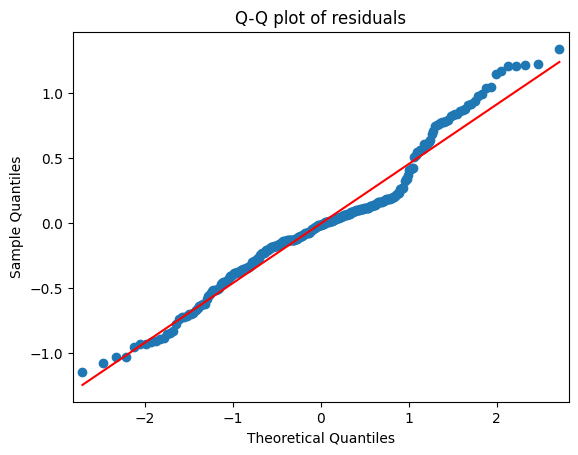

In [593]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
residuals = model_ols.resid

# Create a Q-Q plot for the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

In [594]:
fitted_values = model_ols.fittedvalues
deviations = y_train - fitted_values

# use the Huber-White estimator
weights = (abs(deviations)) ** 0.5
wls_model = sm.WLS(y_train, X_train_const, weights=weights).fit(cov_type='HC3')
print(wls_model.summary())

                                      WLS Regression Results                                     
Dep. Variable:     qual_titolo_studio_massimo_conseguito   R-squared:                       0.128
Model:                                               WLS   Adj. R-squared:                  0.085
Method:                                    Least Squares   F-statistic:                     2.064
Date:                                   Sat, 25 Jan 2025   Prob (F-statistic):             0.0138
Time:                                           16:26:30   Log-Likelihood:                -294.82
No. Observations:                                    298   AIC:                             619.6
Df Residuals:                                        283   BIC:                             675.1
Df Model:                                             14                                         
Covariance Type:                                     HC3                                         
                    

In [595]:
# ordinal logit

from statsmodels.miscmodels.ordinal_model import OrderedModel

model = OrderedModel(y_train, X_train, distr='logit')
results = model.fit(maxiter = 10000) #start_params=None,

print(results.summary())


Optimization terminated successfully.
         Current function value: 1.178246
         Iterations: 7115
         Function evaluations: 8955
                                       OrderedModel Results                                      
Dep. Variable:     qual_titolo_studio_massimo_conseguito   Log-Likelihood:                -351.12
Model:                                      OrderedModel   AIC:                             742.2
Method:                               Maximum Likelihood   BIC:                             816.2
Date:                                   Sat, 25 Jan 2025                                         
Time:                                           16:26:39                                         
No. Observations:                                    298                                         
Df Residuals:                                        278                                         
Df Model:                                             14                  

In [596]:
log_likelihood_model = results.llf
log_likelihood_null = results.llnull
n = len(dfa_test_log)
r2_mcfadden = 1 - (log_likelihood_model / log_likelihood_null)


print("McFadden's R^2:", r2_mcfadden)


McFadden's R^2: 0.04591773830584578


In [597]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
print("Selected Features (Non-Zero Coefficients):")
for feature, coef in zip(X.columns, lasso.coef_):
    if coef != 0:
        print(f"{feature}: {coef:.4f}")
print("\nBest Alpha (Regularization Strength):", lasso.alpha_)
print("Intercept:", lasso.intercept_)

Selected Features (Non-Zero Coefficients):
adopt_age: -0.1480
presenza_certificazione_sensi_l170_2010: -0.0563
attualmente_lavora: -0.0020
qual_titolo_studio_massimo_conseguito_madre: 0.0424
sibling_adopt_yes: 0.1024
fatto_esperienze_allestero: 0.1144
genere_fem: 0.1204
prima_classe_frequenza_scuola: -0.0121
dovuto_ripetere_anni_madre: -0.0569
adozione_int: 0.0132

Best Alpha (Regularization Strength): 0.009019438036467105
Intercept: -0.00694620794825253


## EDA

In [598]:
pd.crosstab(index=dfa_test['qual_titolo_studio_massimo_conseguito'], columns=dfa_test['genere_fem'], margins=True)


genere_fem,0,1,All
qual_titolo_studio_massimo_conseguito,,,
0.5,0,1,1
1.0,22,12,34
2.0,33,17,50
3.0,132,94,226
4.0,6,4,10
5.0,16,27,43
6.0,3,6,9
All,212,161,373


In [599]:
pd.crosstab(index=dfa_test['genere_fem'], columns=[dfa_test['presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992'], dfa_test['presenza_certificazione_sensi_l170_2010']], margins=True)


presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992  0.0           \
presenza_certificazione_sensi_l170_2010                        0.0 1.0 99.0   
genere_fem                                                                    
0                                                              136  29   10   
1                                                              107  13   14   
All                                                            243  42   24   

presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 1.0           \
presenza_certificazione_sensi_l170_2010                       0.0 1.0 99.0   
genere_fem                                                                   
0                                                               7   6   12   
1                                                               9   4    4   
All                                                            16  10   16   

presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 99.0           \
presenza_certificazione_sensi_l170_2010                        0.0 1.0 99.0   
genere_fem                                                                    
0                                                                1   2    9   
1                                                                1   2    7   
All                                                              2   4   16   

presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992  All  
presenza_certificazione_sensi_l170_2010                             
genere_fem                                                          
0                                                              212  
1                                                              161  
All                                                            373


## SEM Attempt

**Key Observations:**

Strong Positive Covariance:

dovuto_ripetere_anni_padre and dovuto_ripetere_anni_madre: Covariance = 1.376, indicating that these variables likely increase together.
presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 and presenza_certificazione_sensi_l170_2010: Covariance = 0.818, reflecting a strong association between these two conditions.
Negative Covariance:

adopt_age and scolarizzato_paese_origine_italia_inclusa: Covariance = -0.627, suggesting an inverse relationship.
Minimal Covariance:

pdf_values with all variables has near-zero covariance, suggesting it does not vary significantly with other variables.

In [600]:
dfa_test_log.cov()

,adopt_age,scolarizzato_paese_origine_italia_inclusa,presenza_certificazione_sensi_l170_2010,attualmente_lavora,qual_titolo_studio_massimo_conseguito_madre,presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,sibling_adopt_yes,fatto_esperienze_allestero,genere_fem,school_experience_primary_encoded,prima_classe_frequenza_scuola,dovuto_ripetere_anni_madre,dovuto_ripetere_anni_superiore,adozione_int,qual_titolo_studio_massimo_conseguito
adopt_age,0.250000,-0.095204,-0.023588,-0.009304,0.039744,-0.012448,0.027887,-0.014715,0.005835,0.033789,-0.013312,0.010534,0.018946,0.067045,-0.029296
scolarizzato_paese_origine_italia_inclusa,-0.095204,0.250000,0.008458,0.006297,0.004223,0.014408,-0.021705,0.000070,0.009249,-0.001102,0.027107,0.029043,0.002852,-0.119133,0.005203
presenza_certificazione_sensi_l170_2010,-0.023588,0.008458,0.250000,0.035305,0.000724,0.102257,-0.010696,-0.010595,0.002946,0.021740,-0.004253,0.039778,0.013718,0.012561,-0.019395
attualmente_lavora,-0.009304,0.006297,0.035305,0.250000,0.039015,0.019692,0.001492,0.006235,0.000357,0.053318,0.033796,0.028101,0.000060,-0.001490,-0.007594
qual_titolo_studio_massimo_conseguito_madre,0.039744,0.004223,0.000724,0.039015,0.250000,0.028690,0.030448,-0.000507,0.014272,0.024419,0.031687,0.110047,0.001567,-0.007216,0.009826
presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,-0.012448,0.014408,0.102257,0.019692,0.028690,0.250000,-0.004301,-0.005977,0.002833,0.013666,0.033507,0.036987,0.018745,-0.002601,0.001514
sibling_adopt_yes,0.027887,-0.021705,-0.010696,0.001492,0.030448,-0.004301,0.250000,0.007017,0.004838,0.004329,0.000778,0.008511,0.042929,0.007823,0.040045
fatto_esperienze_allestero,-0.014715,0.000070,-0.010595,0.006235,-0.000507,-0.005977,0.007017,0.250000,-0.001288,-0.006393,-0.006679,-0.011955,-0.018988,0.004566,0.046073
genere_fem,0.005835,0.009249,0.002946,0.000357,0.014272,0.002833,0.004838,-0.001288,0.250000,0.010697,0.026138,-0.002081,0.010034,-0.044363,0.038487
school_experience_primary_encoded,0.033789,-0.001102,0.021740,0.053318,0.024419,0.013666,0.004329,-0.006393,0.010697,0.250000,0.012069,0.035254,0.014657,0.012743,0.005943


In [601]:
!pip install semopy

In [602]:
from semopy import Model

desc = """
family =~ sibling_adopt_yes + dovuto_ripetere_anni_madre + qual_titolo_studio_massimo_conseguito_madre
personal =~ genere_fem + adopt_age + adozione_int + prima_classe_frequenza_scuola
learning_disabilities =~ presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 + presenza_certificazione_sensi_l170_2010
learning_diff =~ dovuto_ripetere_anni_superiore + school_experience_primary_encoded
qual_titolo_studio_massimo_conseguito ~ personal + family +learning_diff + learning_disabilities

learning_diff ~ learning_disabilities

presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 ~~ presenza_certificazione_sensi_l170_2010
"""

model = Model(desc)
model.fit(dfa_test_log, obj="MLW", solver="SLSQP")
model.inspect()


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,learning_diff,~,learning_disabilities,5.541042e-01,0.437038,1.267863,0.204847
1,sibling_adopt_yes,~,family,1.000000e+00,-,-,-
2,dovuto_ripetere_anni_madre,~,family,2.348278e+01,30.284101,0.775416,0.438094
3,qual_titolo_studio_massimo_conseguito_madre,~,family,1.034271e+01,12.611198,0.820121,0.412147
4,genere_fem,~,personal,1.000000e+00,-,-,-
5,adopt_age,~,personal,-1.530944e+00,0.52846,-2.896991,0.003768
6,adozione_int,~,personal,-5.706316e+00,4.378595,-1.30323,0.192496
7,prima_classe_frequenza_scuola,~,personal,8.379390e-01,0.380565,2.201831,0.027677
8,presenza_patologie_certificate_sensi_104_comma...,~,learning_disabilities,1.000000e+00,-,-,-
9,presenza_certificazione_sensi_l170_2010,~,learning_disabilities,1.403780e+00,0.508305,2.761689,0.00575


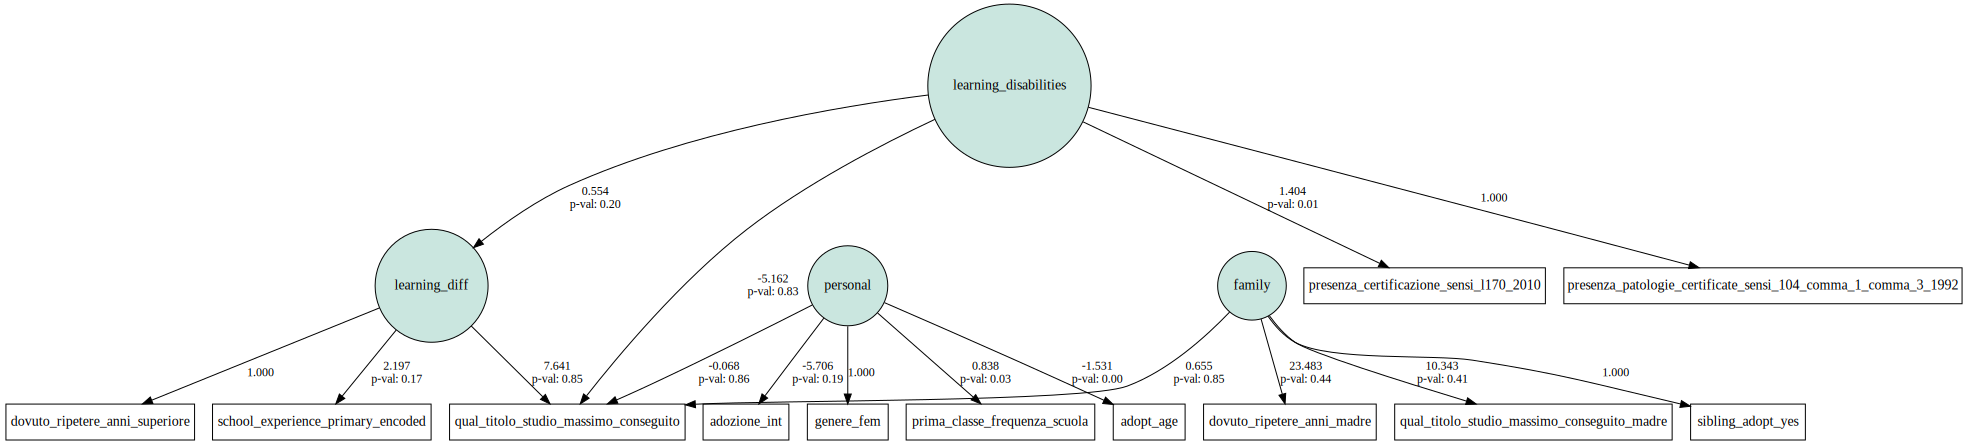

In [603]:
from semopy import calc_stats, semplot

calc_stats(model)
semplot(model, filename='t.pdf')


In [604]:
desc2 = """
personal =~ adozione_int + adopt_age + genere_fem
family =~ sibling_adopt_yes + dovuto_ripetere_anni_madre
experiences =~ fatto_esperienze_allestero + prima_classe_frequenza_scuola
qual_titolo_studio_massimo_conseguito_madre ~ personal + family + experiences
presenza_certificazione_sensi_l170_2010 ~ personal + family
"""

model2 = Model(desc2)
model2.fit(dfa_test_log, obj="MLW", solver="SLSQP")
model2.inspect()

# adopt_age: -0.1428
# presenza_certificazione_sensi_l170_2010: -0.0542
# qual_titolo_studio_massimo_conseguito_madre: 0.0371
# sibling_adopt_yes: 0.1001
# fatto_esperienze_allestero: 0.1123
# genere_fem: 0.1171
# prima_classe_frequenza_scuola: -0.0095
# dovuto_ripetere_anni_madre: -0.0528
# adozione_int: 0.0092

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,adozione_int,~,personal,1.000000,-,-,-
1,adopt_age,~,personal,0.268178,0.193942,1.382773,0.166734
2,genere_fem,~,personal,-0.177451,0.13407,-1.323567,0.185647
3,sibling_adopt_yes,~,family,1.000000,-,-,-
4,dovuto_ripetere_anni_madre,~,family,83.849860,367.964983,0.227875,0.819744
5,fatto_esperienze_allestero,~,experiences,1.000000,-,-,-
6,prima_classe_frequenza_scuola,~,experiences,-13.209750,47.394619,-0.278718,0.780461
7,qual_titolo_studio_massimo_conseguito_madre,~,personal,-0.563262,13.98572,-0.040274,0.967875
8,qual_titolo_studio_massimo_conseguito_madre,~,family,53.875224,504.887506,0.106707,0.915021
9,qual_titolo_studio_massimo_conseguito_madre,~,experiences,46.594076,1203.606247,0.038712,0.96912


In [605]:
from semopy import calc_stats

calc_stats(model2)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,21,36,38.42915,0.011474,183.68539,0.881985,0.790788,0.641351,0.790788,0.797688,0.047234,47.793946,141.911828,0.103027


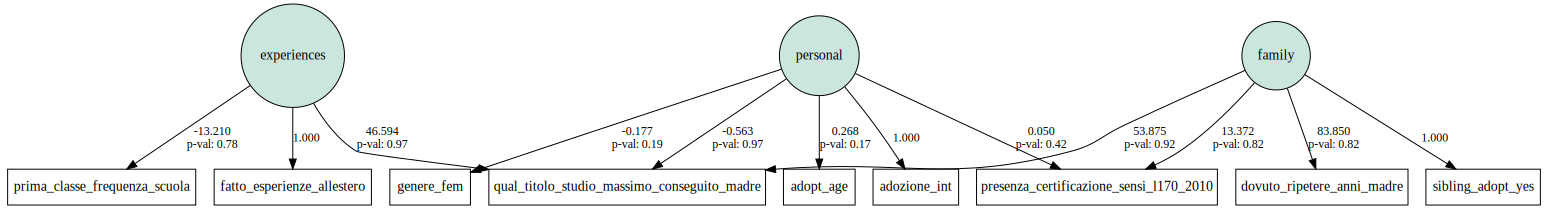

In [606]:
from semopy import semplot
semplot(model2, filename='t.pdf')


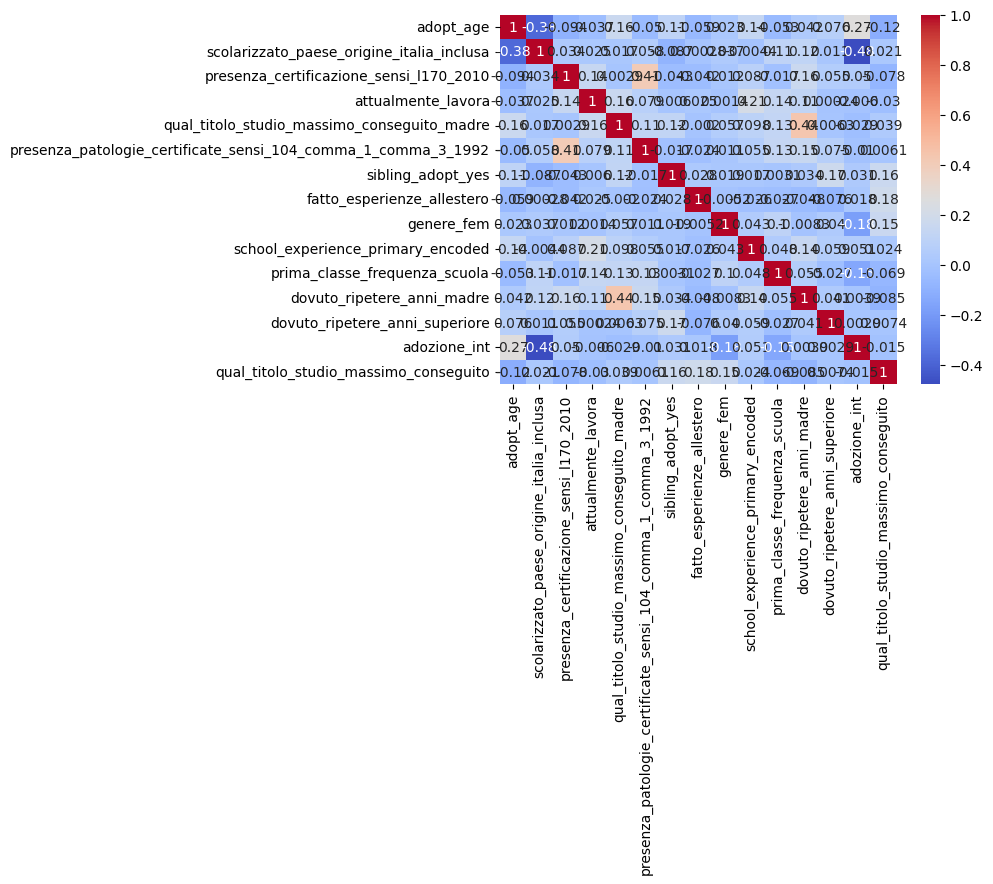

<Figure size 800x600 with 0 Axes>

In [607]:
import  seaborn as sns
correlation_matrix = dfa_test_log.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(8, 6))
plt.show()

### MCA


In [608]:
dfa_test

,adopt_age,scolarizzato_paese_origine_italia_inclusa,presenza_certificazione_sensi_l170_2010,attualmente_lavora,qual_titolo_studio_massimo_conseguito_madre,presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,sibling_adopt_yes,fatto_esperienze_allestero,genere_fem,school_experience_primary_encoded,prima_classe_frequenza_scuola,dovuto_ripetere_anni_madre,dovuto_ripetere_anni_superiore,adozione_int,qual_titolo_studio_massimo_conseguito
2,1.0,0.0,0.0,1.0,1.0,0.0,1,0,1,3.0,4.0,99.0,99.0,0,5.0
4,5.0,1.0,1.0,0.0,5.0,0.0,0,0,1,3.0,2.0,1.0,1.0,0,3.0
5,15.0,0.0,1.0,0.0,6.0,0.0,0,0,1,3.0,2.0,0.0,0.0,1,3.0
6,0.0,0.0,0.0,1.0,5.0,0.0,1,1,0,2.0,1.0,0.0,99.0,0,6.0
7,3.0,1.0,0.0,1.0,3.0,0.0,1,0,0,2.0,2.0,0.0,0.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,6.0,0.0,0.0,1.0,6.0,0.0,1,0,0,1.0,3.0,1.0,99.0,1,1.0
773,7.0,0.0,0.0,1.0,6.0,0.0,0,0,0,3.0,4.0,1.0,1.0,1,3.0
778,6.0,0.0,0.0,0.0,3.0,0.0,0,0,0,2.0,2.0,0.0,0.0,1,3.0
783,2.0,99.0,0.0,0.0,99.0,0.0,0,0,1,2.0,2.0,99.0,99.0,1,5.0


In [609]:
binary_columns = [
    'scolarizzato_paese_origine_italia_inclusa',
    'presenza_certificazione_sensi_l170_2010',
    'attualmente_lavora',
    'presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
    'sibling_adopt_yes',
    'fatto_esperienze_allestero',
    'genere_fem',
    'adozione_int'
]
for col in binary_columns:
    dfa_test[col] = dfa_test[col].astype('category')

In [610]:
!pip install prince


In [611]:
import prince
independent_columns = dfa_test.columns.difference(['adopt_age','qual_titolo_studio_massimo_conseguito','dovuto_ripetere_anni_padre','dovuto_ripetere_anni_madre','fatto_esperienze_allestero','scolarizzato_paese_origine_italia_inclusa'])
mca_df = dfa_test[independent_columns]
mca = prince.MCA(n_components=2, random_state=42)

mca = mca.fit(mca_df)

mca_result = mca.transform(mca_df)

In [612]:
mca_df

,adozione_int,attualmente_lavora,dovuto_ripetere_anni_superiore,genere_fem,presenza_certificazione_sensi_l170_2010,presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,prima_classe_frequenza_scuola,qual_titolo_studio_massimo_conseguito_madre,school_experience_primary_encoded,sibling_adopt_yes
2,0,1.0,99.0,1,0.0,0.0,4.0,1.0,3.0,1
4,0,0.0,1.0,1,1.0,0.0,2.0,5.0,3.0,0
5,1,0.0,0.0,1,1.0,0.0,2.0,6.0,3.0,0
6,0,1.0,99.0,0,0.0,0.0,1.0,5.0,2.0,1
7,0,1.0,0.0,0,0.0,0.0,2.0,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
772,1,1.0,99.0,0,0.0,0.0,3.0,6.0,1.0,1
773,1,1.0,1.0,0,0.0,0.0,4.0,6.0,3.0,0
778,1,0.0,0.0,0,0.0,0.0,2.0,3.0,2.0,0
783,1,0.0,99.0,1,0.0,0.0,2.0,99.0,2.0,0


In [613]:
mca = prince.MCA(n_components=9, engine='sklearn',random_state=42)
mca = mca.fit(mca_df)

In [614]:
mca.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.188,5.52%,5.52%
1,0.175,5.14%,10.66%
2,0.166,4.88%,15.54%
3,0.147,4.31%,19.85%
4,0.141,4.14%,23.99%
5,0.136,3.99%,27.97%
6,0.128,3.76%,31.74%
7,0.125,3.66%,35.40%
8,0.120,3.52%,38.92%


In [615]:
ax = mca.plot(dfa_test)
ax

alt.LayerChart(...)

##Children survey results

In [616]:
dfc = pd.read_excel('results kids.xlsx')

In [617]:
dfc.shape

(235, 93)

In [618]:
dfc = dfc.dropna(axis=1, how='all')
dfc.shape

(235, 91)

In [619]:
dfc = dfc.dropna(thresh=int(0.10 * dfc.shape[1]), axis=0)
dfc.shape

(177, 91)

In [620]:
dfc = dfc.loc[:, dfc.apply(pd.Series.nunique) > 1]
dfc.shape

(177, 88)

In [621]:
column_types = dfc.dtypes

type_counts = column_types.value_counts()
print("Column types and counts:")
print(type_counts)

Column types and counts:
object            69
float64           14
datetime64[ns]     3
int64              2
Name: count, dtype: int64


In [622]:
stop_words = set(stopwords.words('italian'))

def remove_italian_stopwords(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col)
    words = [word for word in col.split('_') if word not in stop_words]
    return '_'.join(words)

column_mapping = {col: remove_italian_stopwords(col) for col in dfc.columns}
dfc.columns = [column_mapping[col] for col in dfc.columns]
column_mapping

{'id. ID risposta': 'id_id_risposta',
 'submitdate. Data invio': 'submitdate_data_invio',
 'lastpage. Ultima pagina': 'lastpage_ultima_pagina',
 'seed. Seme': 'seed_seme',
 'startdate. Data di inizio': 'startdate_data_inizio',
 "datestamp. Data dell'ultima azione": 'datestamp_data_dellultima_azione',
 'refurl. URL di riferimento': 'refurl_url_riferimento',
 "Privacy[SQ001]. In base a quanto previsto dal regolamento Ue n. 679/ 2016 e dal d. Lgs. 30 giugno 2003 n. 196 s.m.i. nonché dall'autorizzazione del garante della privacy n. 5/2002 al trattamento dei dati da parte di diverse categorie di titolari, i dati che la riguardano e che ci vengono liberamente comunicati, registrati su questo questionario online, sono protetti e anonimi. Il questionario, infatti, non chiede dati identificativi, non traccia l’IP, non memorizza i\xa0cookies\xa0dei rispondenti e in nessun modo è possibile risalire al compilatore. Le risposte al questionario saranno trattate in via tutto riservata e in forma aggr

In [623]:
dfc = dfc.iloc[:, 10:]

In [624]:
dfc = dfc.dropna(subset=['g2q00014_concluso_percorso_istruzione_formazione'])


In [625]:
dfc.head()

,g2q00001_genere,g2q00002sq001_sq001_anno_nascita_anno_nascita,g2q00003_adozione,g2q00004sq001_sq001_anno_arrivo_famiglia_anno,g2q00005_stato_provenienza,g2q00006_scolarizzato_paese_origine_italia_inclusa,g2q00009sq001_sq001_età_inserimento_scuola_età,g2q00010_prima_classe_frequenza_scuola,g2q00011_pdp_bes_certificato_2013,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,...,g8q00003sq001_sq001_valutazione_voto60,g8q00003a_conseguito_laurea_triennale_magistrale,g8q00004sq001_sq001_voto_laurea_voto110,g8q00005_professione_padre_quando_fatto_scelta_scuola_secondaria_ii_grado_superiore,g8q00006sq001_padre_mai_stato_organi_collegiali_scuole_propri_figli_no,g8q00006sq002_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,g8q00006sq005_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,g8q00006sq004_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,g8q00007_padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,g8q00008_padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
1,Femmina,1969.0,Nazionale,1969.0,Ita,No,2.0,Asilo nido,No,No,...,NaN,NaN,NaN,Impiegato,Sì,No,No,No,NaN,NaN
2,Maschio,1996.0,Internazionale,2000.0,Ucraina,Sì,6.0,Asilo nido,No,No,...,NaN,NaN,110.0,Docente universitario,Sì,No,No,No,No,No
5,Femmina,1984.0,Internazionale,1986.0,India,No,3.0,Asilo nido,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Maschio,2001.0,Internazionale,2002.0,Brasile,No,2.0,Asilo nido,No,No,...,50.0,NaN,NaN,impiegato,Sì,No,No,No,No,No
9,Maschio,1994.0,Internazionale,2005.0,Brasile,Sì,10.0,Quinta elementare,No,Sì,...,50.0,NaN,NaN,Imprenditore,Sì,No,No,No,No,No


In [626]:
dfc['genere'] = dfc['g2q00001_genere'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfc['adozione_int'] = dfc['g2q00003_adozione'].apply(lambda x: 1 if x == 'Internazionale' else 0)
dfc['adopt_age'] = dfc['g2q00004sq001_sq001_anno_arrivo_famiglia_anno'] - dfc['g2q00002sq001_sq001_anno_nascita_anno_nascita']
dfc = dfc.drop(['g2q00001_genere', 'g2q00003_adozione'], axis=1)


In [627]:
for col in dfc.columns:
    if isinstance(dfc[col], pd.Series):
        unique_values = dfc[col].dropna().unique()
        if set(unique_values).issubset({'Sì', 'No'}):
            dfc[col] = dfc[col].replace({'Sì': 1, 'No': 0})
dfc.head()

<ipython-input-627-ec315daae816>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfc[col] = dfc[col].replace({'Sì': 1, 'No': 0})


,g2q00002sq001_sq001_anno_nascita_anno_nascita,g2q00004sq001_sq001_anno_arrivo_famiglia_anno,g2q00005_stato_provenienza,g2q00006_scolarizzato_paese_origine_italia_inclusa,g2q00009sq001_sq001_età_inserimento_scuola_età,g2q00010_prima_classe_frequenza_scuola,g2q00011_pdp_bes_certificato_2013,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,g2q00013_presenza_certificazione_sensi_l170_2010,g2q00014_concluso_percorso_istruzione_formazione,...,g8q00005_professione_padre_quando_fatto_scelta_scuola_secondaria_ii_grado_superiore,g8q00006sq001_padre_mai_stato_organi_collegiali_scuole_propri_figli_no,g8q00006sq002_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,g8q00006sq005_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,g8q00006sq004_padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,g8q00007_padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,g8q00008_padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore,genere,adozione_int,adopt_age
1,1969.0,1969.0,Ita,0.0,2.0,Asilo nido,0.0,0.0,0.0,1,...,Impiegato,1.0,0.0,0.0,0.0,NaN,NaN,1,0,0.0
2,1996.0,2000.0,Ucraina,1.0,6.0,Asilo nido,0.0,0.0,0.0,1,...,Docente universitario,1.0,0.0,0.0,0.0,No,0.0,0,1,4.0
5,1984.0,1986.0,India,0.0,3.0,Asilo nido,0.0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2.0
6,2001.0,2002.0,Brasile,0.0,2.0,Asilo nido,0.0,0.0,1.0,1,...,impiegato,1.0,0.0,0.0,0.0,No,0.0,0,1,1.0
9,1994.0,2005.0,Brasile,1.0,10.0,Quinta elementare,0.0,1.0,0.0,1,...,Imprenditore,1.0,0.0,0.0,0.0,No,0.0,0,1,11.0


In [628]:
dfc['g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992'].isna().sum()


14

In [629]:
experience_mapping = {
    'Per niente': 1,
    'Poco': 2,
    'Abbastanza': 3,
    'Molto': 4
}

for col in ['g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti',
'g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre',
'g2q00030asq003_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_padre',
 'g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici',
'g2q00030asq005_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_te_stesso']:
  dfc[col] = dfc[col].map(experience_mapping)

In [630]:
dfc.isna().sum().sort_values(ascending=False)


,0
g2q00028other_lasciato_altro,118
g2q00023other_scuola_secondaria_secondo_grado_superiore_frequentato_altro,118
g2q00017_lasciato,117
g2q00016_iscritto_scuola_secondaria_secondo_grado_superiore,116
g2q00026_tipologia_cambio,115
...,...
genere,0
g2q00002sq001_sq001_anno_nascita_anno_nascita,0
g2q00004sq001_sq001_anno_arrivo_famiglia_anno,0
g2q00014_concluso_percorso_istruzione_formazione,0


In [631]:
dfc = dfc.dropna(thresh=len(dfc) - 100, axis=1)

In [632]:
numeric_columns = dfc.select_dtypes(exclude=['object']).columns

# Columns without 'voto' in their name - fill NaNs with 99
columns_to_replace_99 = [col for col in numeric_columns if 'voto' not in col]
dfc.loc[:, columns_to_replace_99] = dfc[columns_to_replace_99].fillna(99)

# Columns with 'voto' in their name - fill NaNs with 0
columns_to_replace_0 = [col for col in numeric_columns if 'voto' in col]
dfc.loc[:, columns_to_replace_0] = dfc[columns_to_replace_0].fillna(0)

In [633]:
dfc.loc[:,'g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni'] = dfc['g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni'].fillna(0)

In [634]:
dfc.g2q00015_qual_titolo_studio_massimo_conseguito.value_counts()

,count
g2q00015_qual_titolo_studio_massimo_conseguito,
4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni),43
6.\tTitolo di studio universitario,25
"7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)",15
3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni),15
2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore),4
5.\tTitolo post-secondario non terziario (IFTS),2
8.\tDottorato di ricerca,1


In [635]:
hierarchical_mapping = {
    'Asilo nido': 1,
    'Scuola materna': 2,
    'Scuola d\'infanzia': 3,
    'Prima elementare': 4,
    'Seconda elementare': 5,
    'Terza elementare': 6,
    'Quarta elementare': 7,
    'Prima media': 8,
    'Seconda media': 9,
    'Terza media': 10,
    'Altro': 0
}

dfc.loc[:, 'prima_classe_frequenza_scuola'] = dfc['g2q00010_prima_classe_frequenza_scuola'].map(hierarchical_mapping)


In [636]:
mapping = {
    '1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria': 0.5,
    '2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)': 1,
    '3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)': 2,
    '4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)': 3,
    '5.\tTitolo post-secondario non terziario (IFTS)': 4,
    '6.\tTitolo di studio universitario': 5,
    '7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)': 6,
    '8.\tDottorato di ricerca': 7,
}

for col in ['g2q00015_qual_titolo_studio_massimo_conseguito','g8q00002_qual_titolo_studio_massimo_conseguito_padre','g7q00002_qual_titolo_studio_massimo_conseguito_madre']:
  dfc[col] = dfc[col].map(mapping)


In [637]:
ierarchical_mapping = {
    'Peggiori': 0,
    'Uguali': 1,
    'Migliori': 2,
    'Non so': 99 }

dfc.loc[:, 'prospettive_economiche_rispetto_genitori_sonosaranno_encoded'] = dfc['g2q00039_pensi_prospettive_economiche_rispetto_genitori_sonosaranno'].map(hierarchical_mapping)


In [638]:
encoding_mapping = {
    'Impegnativo nello stesso modo': 0,
    'Più impegnativo': 1,
    'Meno impegnativo': 2
}

columns_to_encode = [
    'g2q00038sq004_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_università',
    'g2q00038sq003_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_secondaria_ii_grado',
    'g2q00038sq001_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_primaria'
]

for col in columns_to_encode:
    dfc.loc[:, col] = dfc[col].map(encoding_mapping)

column_mapping = {
    'g2q00038sq004_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_università': 'esperienza_uni',
    'g2q00038sq003_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_secondaria_ii_grado': 'esperienza_ss',
    'g2q00038sq001_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_primaria': 'esperienza_sp'
}

dfc = dfc.rename(columns=column_mapping)


In [639]:
dfc = dfc.dropna(subset=['g2q00015_qual_titolo_studio_massimo_conseguito'])
# g2q00011_pdp_bes_certificato_2013	g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992	g2q00013_presenza_certificazione_sensi_l170_2010

In [640]:
dfc_test = dfc[[
    'genere',
    'adozione_int',
    "adopt_age",
    'prima_classe_frequenza_scuola',
    # 'g2q00011_pdp_bes_certificato_2013',
    'g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
    'g2q00013_presenza_certificazione_sensi_l170_2010',
    # "g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni",
    # "g2q00036_fatto_esperienze_allestero",
    # 'prospettive_economiche_rispetto_genitori_sonosaranno_encoded',
    # 'esperienza_uni',
    # 'esperienza_ss',
    'esperienza_sp',
    'g2q00022sq001_sq002_valutazione_voto100',
    # 'g8q00002_qual_titolo_studio_massimo_conseguito_padre',
    'g7q00002_qual_titolo_studio_massimo_conseguito_madre',
    'g2q00015_qual_titolo_studio_massimo_conseguito',
    'g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti',
'g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre',
# 'g2q00030asq003_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_padre',
 'g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici']].fillna(99)

<ipython-input-640-0a2b7d6bef94>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici']].fillna(99)


In [641]:
dfc_test.head()

,genere,adozione_int,adopt_age,prima_classe_frequenza_scuola,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,g2q00013_presenza_certificazione_sensi_l170_2010,esperienza_sp,g2q00022sq001_sq002_valutazione_voto100,g7q00002_qual_titolo_studio_massimo_conseguito_madre,g2q00015_qual_titolo_studio_massimo_conseguito,g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti,g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre,g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici
1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,6.0,1.0,1.0,1.0
2,0,1,4.0,1.0,0.0,0.0,1.0,70.0,7.0,3.0,3.0,1.0,1.0
6,0,1,1.0,1.0,0.0,1.0,0.0,85.0,6.0,3.0,1.0,4.0,1.0
9,0,1,11.0,99.0,1.0,0.0,0.0,0.0,6.0,6.0,2.0,4.0,4.0
14,1,0,9.0,6.0,0.0,0.0,1.0,0.0,6.0,6.0,4.0,4.0,3.0


In [642]:
dfc_test['adopt_age'] = dfc_test['adopt_age'].replace(-1, 0)

In [643]:
# Separate predictors and target
X = dfc_test.drop(columns=['g2q00015_qual_titolo_studio_massimo_conseguito'])
y = dfc_test['g2q00015_qual_titolo_studio_massimo_conseguito']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test the Gauss-Markov assumptions on the training data

gauss_markov_assumptions(X_train, y_train)

Durbin-Watson statistic: 2.026314232496409
Breusch-Pagan Test p-value: 0.014662482479689268

Variance Inflation Factors (VIF):
                                              feature       VIF
0                                              genere  1.755677
1                                        adozione_int  2.503640
2                                           adopt_age  2.515466
3                       prima_classe_frequenza_scuola  1.190394
4   g2q00012_presenza_patologie_certificate_sensi_...  1.985055
5    g2q00013_presenza_certificazione_sensi_l170_2010  2.385545
6                                       esperienza_sp  1.355454
7             g2q00022sq001_sq002_valutazione_voto100  1.523104
8   g7q00002_qual_titolo_studio_massimo_conseguito...  1.315491
9   g2q00030asq001_pesato_seguenti_figure_scelta_s...  2.519949
10  g2q00030asq002_pesato_seguenti_figure_scelta_s...  4.293191
11  g2q00030asq004_pesato_seguenti_figure_scelta_s...  2.442517


In [644]:
columns = dfc_test.columns.tolist()

dfc_test_log = scale_by_2std(dfc_test, columns)

# scaler = StandardScaler()

# dfc_test_log = pd.DataFrame(
#     scaler.fit_transform(dfc_test),
#     columns=dfc_test.columns
# )
# print(dfc_test_log.describe())

In [645]:
dfc_test_log.isna().sum()

,0
genere,0
adozione_int,0
adopt_age,0
prima_classe_frequenza_scuola,0
g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,0
g2q00013_presenza_certificazione_sensi_l170_2010,0
esperienza_sp,0
g2q00022sq001_sq002_valutazione_voto100,0
g7q00002_qual_titolo_studio_massimo_conseguito_madre,0
g2q00015_qual_titolo_studio_massimo_conseguito,0


In [646]:
X = dfc_test_log.drop(columns=['g2q00015_qual_titolo_studio_massimo_conseguito'])
y = dfc_test_log['g2q00015_qual_titolo_studio_massimo_conseguito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y, X)

results = model.fit(cov_type='HC3')

print(results.summary())

                                               OLS Regression Results                                              
Dep. Variable:     g2q00015_qual_titolo_studio_massimo_conseguito   R-squared (uncentered):                   0.247
Model:                                                        OLS   Adj. R-squared (uncentered):              0.150
Method:                                             Least Squares   F-statistic:                              2.943
Date:                                            Sat, 25 Jan 2025   Prob (F-statistic):                     0.00166
Time:                                                    16:27:04   Log-Likelihood:                         -60.794
No. Observations:                                             105   AIC:                                      145.6
Df Residuals:                                                  93   BIC:                                      177.4
Df Model:                                                      12       

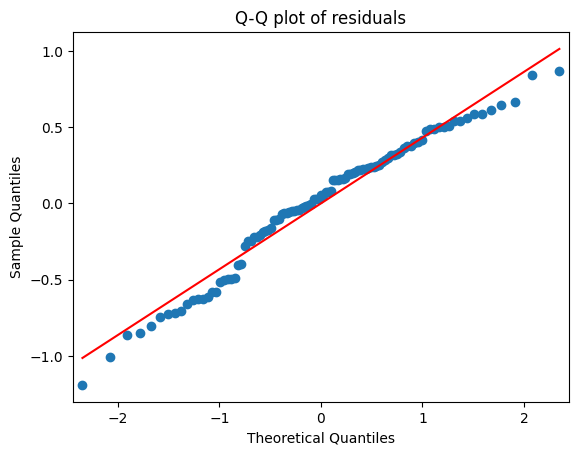

In [647]:
residuals = results.resid

# Create a Q-Q plot for the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

In [648]:
# ordinal logit

model_ord = OrderedModel(y_train, X_train, distr='logit')
results = model_ord.fit(maxiter = 10000)
print(results.summary())

Optimization terminated successfully.
         Current function value: 1.317165
         Iterations: 4058
         Function evaluations: 5276
                                           OrderedModel Results                                           
Dep. Variable:     g2q00015_qual_titolo_studio_massimo_conseguito   Log-Likelihood:                -110.64
Model:                                               OrderedModel   AIC:                             255.3
Method:                                        Maximum Likelihood   BIC:                             296.6
Date:                                            Sat, 25 Jan 2025                                         
Time:                                                    16:27:07                                         
No. Observations:                                              84                                         
Df Residuals:                                                  67                                         
Df

In [649]:
for col in dfc_test:
    dfc_test[col] = np.ceil(dfc_test[col]).astype(int)

dfc_test.head()

,genere,adozione_int,adopt_age,prima_classe_frequenza_scuola,g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,g2q00013_presenza_certificazione_sensi_l170_2010,esperienza_sp,g2q00022sq001_sq002_valutazione_voto100,g7q00002_qual_titolo_studio_massimo_conseguito_madre,g2q00015_qual_titolo_studio_massimo_conseguito,g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti,g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre,g2q00030asq004_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_amici
1,1,0,0,1,0,0,0,0,1,6,1,1,1
2,0,1,4,1,0,0,1,70,7,3,3,1,1
6,0,1,1,1,0,1,0,85,6,3,1,4,1
9,0,1,11,99,1,0,0,0,6,6,2,4,4
14,1,0,9,6,0,0,1,0,6,6,4,4,3


SEM

In [651]:
import semopy
from semopy import Model

desc = """
personal =~ genere + adopt_age + adozione_int + prima_classe_frequenza_scuola
school_exp =~ esperienza_sp + g2q00030asq001_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_insegnanti + g2q00030asq002_pesato_seguenti_figure_scelta_scolastica_relativa_percorso_studio_madre
learning_diff =~ g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 + g2q00013_presenza_certificazione_sensi_l170_2010

school_exp ~~ learning_diff

g2q00015_qual_titolo_studio_massimo_conseguito ~ personal + school_exp +learning_diff

"""
# + g2q00013_presenza_certificazione_sensi_l170_2010, family =~ g7q00002_qual_titolo_studio_massimo_conseguito_madre
# g2q00015_qual_titolo_studio_massimo_conseguito ~ adopt_age + genere

model = Model(desc)
model.fit(dfc_test_log, obj="MLW", solver="SLSQP")
model.inspect()


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,genere,~,personal,1.000000e+00,-,-,-
1,adopt_age,~,personal,-1.239954e+00,0.690584,-1.795514,0.072572
2,adozione_int,~,personal,-1.361466e+00,0.749131,-1.817393,0.069157
3,prima_classe_frequenza_scuola,~,personal,1.116570e-01,0.4106,0.271936,0.785671
4,esperienza_sp,~,school_exp,1.000000e+00,-,-,-
5,g2q00030asq001_pesato_seguenti_figure_scelta_s...,~,school_exp,3.500551e+00,1.681461,2.081851,0.037356
6,g2q00030asq002_pesato_seguenti_figure_scelta_s...,~,school_exp,4.923419e+00,2.581449,1.907231,0.056491
7,g2q00012_presenza_patologie_certificate_sensi_...,~,learning_diff,1.000000e+00,-,-,-
8,g2q00013_presenza_certificazione_sensi_l170_2010,~,learning_diff,1.955587e+00,0.820245,2.384149,0.017119
9,g2q00015_qual_titolo_studio_massimo_conseguito,~,personal,1.198429e+00,0.698811,1.714954,0.086354


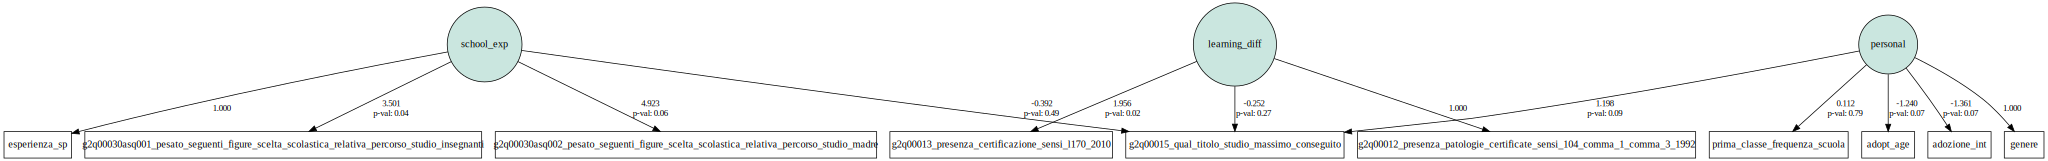

In [652]:
g = semopy.semplot(model, filename='t2.pdf')
semplot(model, filename='t2.pdf')

In [ ]:
print(g)

In [653]:
semopy.report(model, "Children Survey")

In [654]:
from semopy import calc_stats
stats = calc_stats(model)
print(stats)

       DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   30            45  36.983864      0.177615     183.365839  0.949526   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.798306  0.697458  0.798306  0.924289  0.047312  49.295545   

              BIC    LogLik  
Value  115.644554  0.352227  


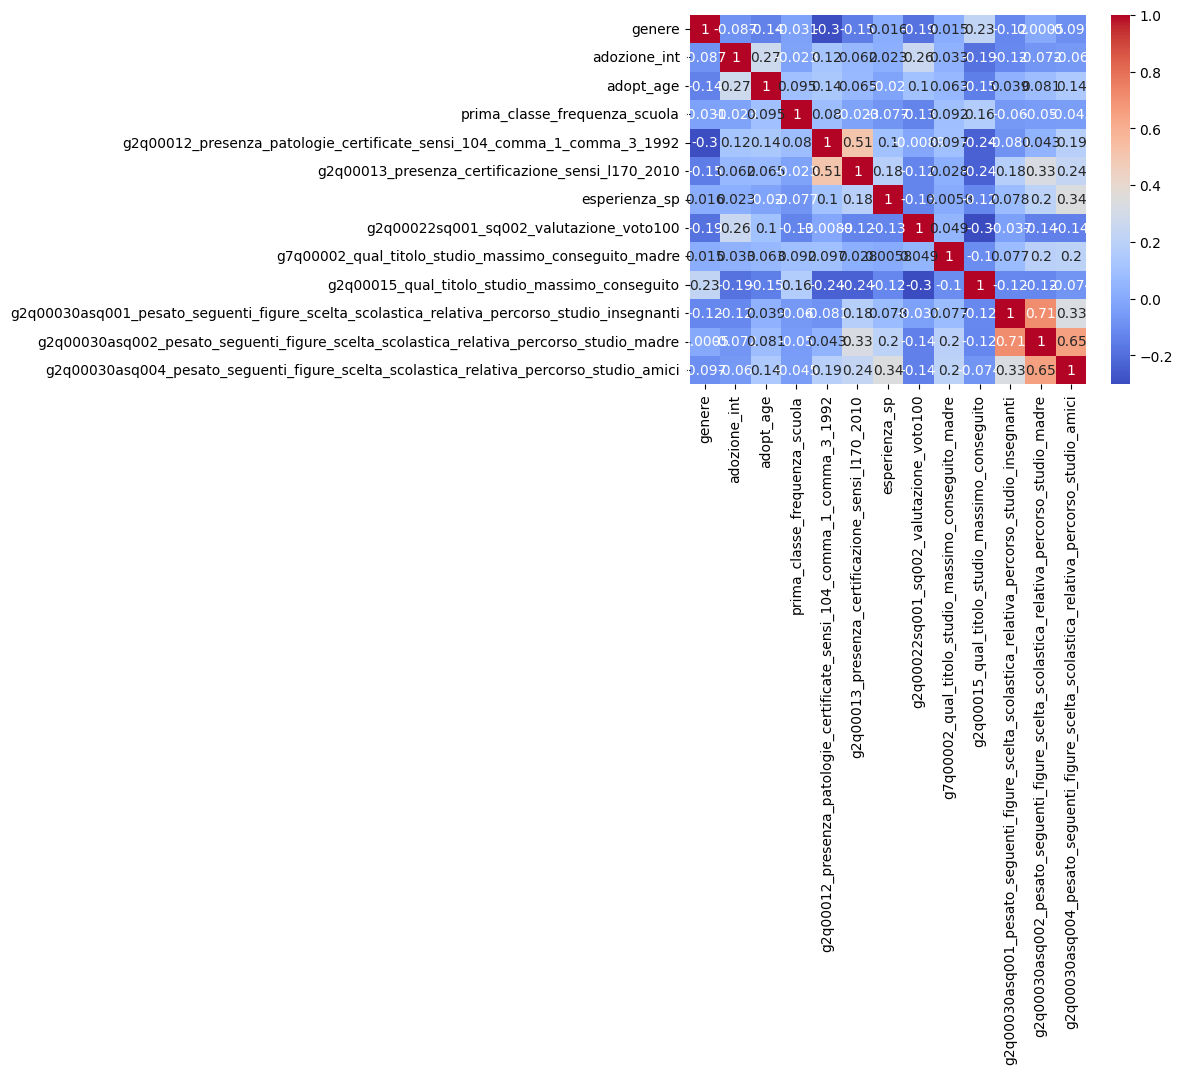

<Figure size 1200x1000 with 0 Axes>

In [655]:
import seaborn as sns

correlation_matrix = dfc_test_log.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(12, 10))
plt.show()


##MCA 2

In [ ]:
dfc_test.head()

In [ ]:
import prince
independent_columns = dfc_test.columns.difference(['adopt_age','g2q00015_qual_titolo_studio_massimo_conseguito'])
mca_df = dfc_test[independent_columns]
mca = prince.MCA(n_components=4, random_state=42)

mca = mca.fit(mca_df)

mca_result = mca.transform(mca_df)

In [ ]:
eigenvalues = mca.eigenvalues_summary
eigenvalues

In [ ]:
ax = mca.plot(dfc_test)
ax

## OTHER
